In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

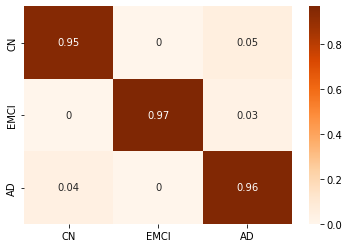

In [2]:
array = np.array([[0.95,	0,	0.05],
[0,	0.97,	0.03],
[0.04,	0,	0.96]
])

column_list = ["CN", "EMCI", "AD"]
# get pandas dataframe
df_cm = pd.DataFrame(array, index=column_list, columns=column_list)


ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)

# ax = plt.axes()
# sns.heatmap(data, ax = ax)

# ax.set_title('lalala')
# plt.show()

[[19.   0.   1. ]
 [ 0.  19.4  0.6]
 [ 0.8  0.  19.2]]


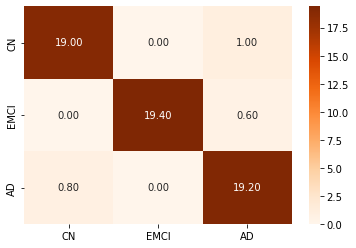

In [3]:
array = np.array([[0.95,	0,	0.05],
[0,	0.97,	0.03],
[0.04,	0,	0.96]
])

array *= 20

print(array)

column_list = ["CN", "EMCI", "AD"]
# get pandas dataframe
df_cm = pd.DataFrame(array, index=column_list, columns=column_list)


ax = sn.heatmap(df_cm, cmap='Oranges', annot=True, fmt = ".2f")

# ax = plt.axes()
# sns.heatmap(data, ax = ax)

# ax.set_title('lalala')
# plt.show()

In [4]:
import torch
import torchio as tio
import numpy as np
import matplotlib.pyplot as plt 
import os
import nibabel as nib

# global settings
base_path = '/mnt/data_lab513/vqtran_data'
root_data = os.path.join(base_path, "data", "raw_data", "ADNI_NIfTI")
root_bias_correction = os.path.join(base_path, "data", "clean_data", "mri_bias_correction")
root_bet = os.path.join(base_path, "data", "clean_data", "mri_brain_extraction")
root_reg = os.path.join(base_path, "data", "clean_data", "mri_registration")
root_meta = os.path.join(base_path, "data", "meta_data")#, "Pre-Thesis_metadata", "ADNI") 
root_train = os.path.join(base_path, "data", "train_data")




In [5]:
import matplotlib.pyplot as plt

def show_slices(slices, color = "gray"):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    
    if color == "gray" or color == "hot" or color == "summer" or color == "jet":
        for i, slice in enumerate(slices):
            plt.axis('off')
            axes[i].imshow(slice.T, cmap=color, origin="lower")
            axes[i].axis('off')
    else: 
        raise Exception("choose gray, hot, summer, or jet for color")
         
def create_and_show_slices(data_volume, color):
    if (len(data_volume.shape) == 4):
        print(data_volume.shape)
        img_data = torch.squeeze(data_volume,0)
    else:
        img_data = data_volume
        
    slice_0 = img_data[img_data.shape[0]//2, :, :]
    slice_1 = img_data[:, img_data.shape[1]//2, :]
    slice_2 = img_data[:, :, img_data.shape[2]//2]
    
    show_slices([slice_0, slice_1, slice_2], color)
    # plt.suptitle("Center slices for EPI image")  

# create_and_show_slices(sample_image_tensor, "gray")

In [6]:
import pandas as pd
DATAFRAME_DIR = "./investigate/positive_inter_class_distance_sorted_dataframe_CN_EMCI_AD.csv"
dataset_csv = pd.read_csv(DATAFRAME_DIR)
dataset_csv.tail()

,Subject ID,Image ID,Image Path,Image Target,DISTANCE CN,DISTANCE EMCI,DISTANCE AD,INTRA_CLASS_DISTANCE,INTER_CLASS_DISTANCE_CN_EMCI,INTER_CLASS_DISTANCE_CN_AD,INTER_CLASS_DISTANCE_EMCI_AD
295,013_S_5071,I360324,/mnt/data_lab513/vqtran_data/data/data_train_d...,AD,0.001839,0.002433,0.001851,0.001851,0.000570,-0.000012,0.000582
296,003_S_1059,I29252,/mnt/data_lab513/vqtran_data/data/data_train_d...,AD,0.004351,0.004653,0.004073,0.004073,0.000859,0.000278,0.000580
297,019_S_5012,I358059,/mnt/data_lab513/vqtran_data/data/data_train_d...,AD,0.002296,0.002807,0.002245,0.002245,0.000613,0.000051,0.000562
298,031_S_4024,I228879,/mnt/data_lab513/vqtran_data/data/data_train_d...,AD,0.002316,0.002896,0.002380,0.002380,0.000452,-0.000064,0.000516
299,141_S_0790,I24147,/mnt/data_lab513/vqtran_data/data/data_train_d...,AD,0.002459,0.002822,0.002331,0.002331,0.000619,0.000128,0.000491


In [33]:
sample_dir = os.path.join(root_data, "ADNI_128_S_2220_MR_MPRAGE_br_raw_20120120155159125_111_S137754_I279601.nii")
sample_img = nib.load(sample_dir)
sample_img_data = sample_img.get_fdata()
sample_image_tensor = torch.Tensor(sample_img_data)

In [36]:
sample_image_tensor.shape
sample_image_tensor = torch.squeeze(sample_image_tensor)

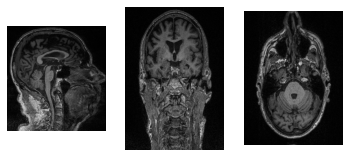

In [37]:
create_and_show_slices(sample_image_tensor, "gray")

In [38]:
sample_dir = os.path.join(root_bias_correction, "ADNI_128_S_2220_MR_MPRAGE_br_raw_20120120155159125_111_S137754_I279601.nii")
sample_img = nib.load(sample_dir)
sample_img_data = sample_img.get_fdata()
sample_image_tensor = torch.Tensor(sample_img_data)

In [39]:
sample_image_tensor.shape
sample_image_tensor = torch.squeeze(sample_image_tensor)

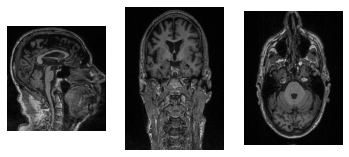

In [40]:
create_and_show_slices(sample_image_tensor, "gray")

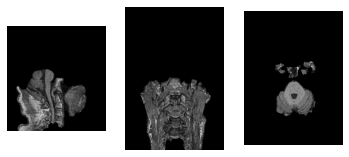

In [42]:
sample_dir = os.path.join(root_bet, "ADNI_128_S_2220_MR_MPRAGE_br_raw_20120120155159125_111_S137754_I279601.nii.gz")
sample_img = nib.load(sample_dir)
sample_img_data = sample_img.get_fdata()
sample_image_tensor = torch.Tensor(sample_img_data)

sample_image_tensor.shape
sample_image_tensor = torch.squeeze(sample_image_tensor)

create_and_show_slices(sample_image_tensor, "gray")

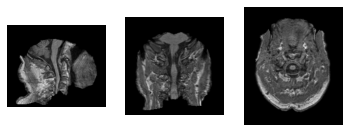

In [43]:
sample_dir = os.path.join(root_reg, "ADNI_128_S_2220_MR_MPRAGE_br_raw_20120120155159125_111_S137754_I279601.nii.gz")
sample_img = nib.load(sample_dir)
sample_img_data = sample_img.get_fdata()
sample_image_tensor = torch.Tensor(sample_img_data)

sample_image_tensor.shape
sample_image_tensor = torch.squeeze(sample_image_tensor)

create_and_show_slices(sample_image_tensor, "gray")

In [27]:
idx = 106
sample_dir = os.path.join(dataset_csv["Image Path"][idx])
sample_img = nib.load(sample_dir)
sample_img_data = sample_img.get_fdata()
sample_image_tensor = torch.Tensor(sample_img_data)


In [29]:
print(sample_dir)

/mnt/data_lab513/vqtran_data/data/data_train_dec/unique/ADNI_128_S_2220_MR_MPRAGE_br_raw_20120120155159125_111_S137754_I279601.nii.gz


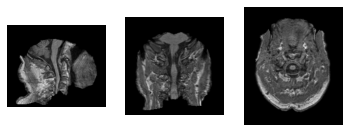

In [28]:
create_and_show_slices(sample_image_tensor, "gray")

In [78]:
image_tensor = torch.unsqueeze(sample_image_tensor,0)
# print(image_tensor.shape) #torch.Size([182, 218, 182])
# print(image_tensor.dtype) #torch.float32

image_transformation_tio_augment = tio.transforms.Compose(
    [
    # tio.RandomAffine(scales= (1.2,1.2), degrees= (-20,20), translation= (-20, 20), center="image"), #, degrees=(-20,20), translation=(0,0.2), center="image"), #????
    # tio.RandomFlip(axes=['LR']),
    tio.transforms.Resize((110,110,110)),
    tio.transforms.ZNormalization(),
    tio.RescaleIntensity(),
    ]
)

image = image_transformation_tio_augment(image_tensor)
# image = torch.unsqueeze(image,0)
image.shape

torch.Size([1, 110, 110, 110])

torch.Size([1, 110, 110, 110])


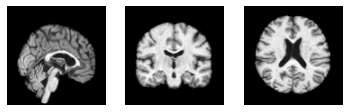

In [79]:
for i in range(1):
    image = image_transformation_tio_augment(image_tensor)
    create_and_show_slices(image, "gray")